In [87]:
## 導入所需的套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [88]:
## 導入日期和價格的數據集
calendar = pd.read_csv('data/calendar.csv.gz')

## 顯示數據集
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,375718,2021-01-01,f,"$2,837.00","$2,837.00",2.0,365.0
1,178036,2020-12-31,f,"$1,276.00","$1,276.00",1.0,90.0
2,178036,2021-01-01,t,"$1,276.00","$1,276.00",1.0,90.0
3,178036,2021-01-02,t,"$1,276.00","$1,276.00",1.0,90.0
4,178036,2021-01-03,t,$580.00,$580.00,1.0,90.0
...,...,...,...,...,...,...,...
1919784,47305522,2021-12-29,f,"$3,200.00","$3,200.00",1.0,1125.0
1919785,47305522,2021-12-30,f,"$3,200.00","$3,200.00",1.0,1125.0
1919786,47305522,2021-12-31,f,"$3,200.00","$3,200.00",1.0,1125.0
1919787,47305522,2022-01-01,f,"$3,200.00","$3,200.00",1.0,1125.0


In [89]:
## 顯示數據集前十筆
calendar.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,375718,2021-01-01,f,"$2,837.00","$2,837.00",2.0,365.0
1,178036,2020-12-31,f,"$1,276.00","$1,276.00",1.0,90.0
2,178036,2021-01-01,t,"$1,276.00","$1,276.00",1.0,90.0
3,178036,2021-01-02,t,"$1,276.00","$1,276.00",1.0,90.0
4,178036,2021-01-03,t,$580.00,$580.00,1.0,90.0
5,178036,2021-01-04,t,$580.00,$580.00,1.0,90.0
6,178036,2021-01-05,t,$580.00,$580.00,1.0,90.0
7,178036,2021-01-06,t,$580.00,$580.00,1.0,90.0
8,178036,2021-01-07,t,$580.00,$580.00,1.0,90.0
9,178036,2021-01-08,t,$638.00,$638.00,2.0,90.0


In [90]:
## 顯示數據大小
calendar.shape

(1919789, 7)

In [92]:
## 筆記: 建議把數據的時間格式整理成 xxxx-xx-xx 這樣就能對時間做一些處理

## 最舊的數據時間和最新的數據時間
calendar.date.min(), calendar.date.max()

('2020-12-31', '2022-01-02')

In [93]:
## 補充用法
## 將數據集中的日期轉換成Pandas可以操作的格式
calendar['date'] = pd.to_datetime(calendar['date'])

## 顯示數據集資訊
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1919789 entries, 0 to 1919788
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 102.5+ MB


In [94]:
## 檢查每個特徵(列別)中有幾個缺失直(NaN)
calendar.isnull().sum()

listing_id          0
date                0
available           0
price               0
adjusted_price      0
minimum_nights    617
maximum_nights    617
dtype: int64

In [95]:
## 移除掉有缺失值的數據行
calendar = calendar.dropna()

## 檢查刪除缺失數據後的數據集大小
calendar.shape

(1919172, 7)

In [96]:
## 顯示數據集類型資訊
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1919172 entries, 0 to 1919788
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 117.1+ MB


In [97]:
## 將price中的"$"、","符號替換成空的
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].str.replace(',', '')

## 顯示數據集
calendar.head()

<ipython-input-97-ddaf6f2f7e80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar['price'] = calendar['price'].str.replace('$', '')
<ipython-input-97-ddaf6f2f7e80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar['price'] = calendar['price'].str.replace(',', '')


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,375718,2021-01-01,f,2837.00,"$2,837.00",2.0,365.0
1,178036,2020-12-31,f,1276.00,"$1,276.00",1.0,90.0
2,178036,2021-01-01,t,1276.00,"$1,276.00",1.0,90.0
3,178036,2021-01-02,t,1276.00,"$1,276.00",1.0,90.0
4,178036,2021-01-03,t,580.00,$580.00,1.0,90.0


In [98]:
## 將"price"轉換成浮點數類型
calendar['price'] = calendar['price'].astype('float64')


## 顯示數據集資訊
calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1919172 entries, 0 to 1919788
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 117.1+ MB


<ipython-input-98-aeed393e2ef3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar['price'] = calendar['price'].astype('float64')


## 視覺化 - 月份跟價錢的關聯圖

In [99]:
## 依據"date"並提取月份進行分組，然後將同個月份的價錢數據取平均當成新數據
mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%b'))['price'].mean()

print('Type: ', type(mean_of_month))
## 顯示數據
mean_of_month 

Type:  <class 'pandas.core.series.Series'>


date
Apr    2665.031882
Aug    2859.538522
Dec    2891.047534
Feb    2651.311152
Jan    2543.447503
Jul    2873.033074
Jun    2708.768898
Mar    2591.639609
May    2665.548945
Nov    2880.687663
Oct    2891.349636
Sep    2868.567611
Name: price, dtype: float64

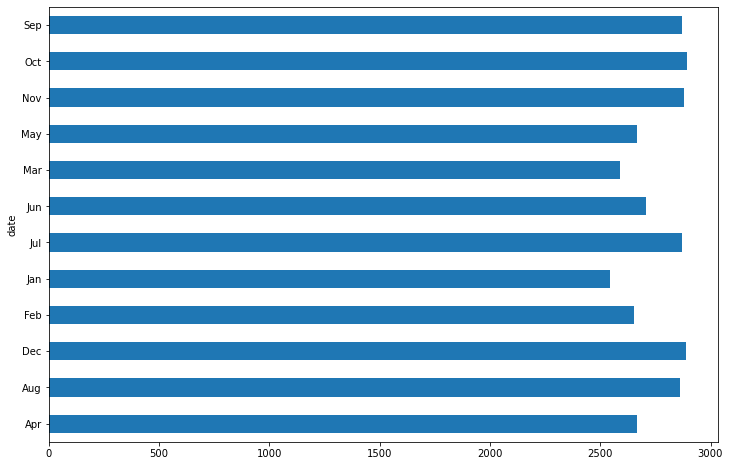

In [100]:
## 視覺化
mean_of_month.plot(kind = 'barh', figsize = (12, 8))

In [101]:
## 構建一個新的列: 表示數據中的日期是一週中的位置 Monday是0 ~ Sunday是7
calendar['dayofweek'] = calendar.date.dt.weekday
## 顯示數據集
calendar

<ipython-input-101-3b1938185b67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar['dayofweek'] = calendar.date.dt.weekday


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,dayofweek
0,375718,2021-01-01,f,2837.0,"$2,837.00",2.0,365.0,4
1,178036,2020-12-31,f,1276.0,"$1,276.00",1.0,90.0,3
2,178036,2021-01-01,t,1276.0,"$1,276.00",1.0,90.0,4
3,178036,2021-01-02,t,1276.0,"$1,276.00",1.0,90.0,5
4,178036,2021-01-03,t,580.0,$580.00,1.0,90.0,6
...,...,...,...,...,...,...,...,...
1919784,47305522,2021-12-29,f,3200.0,"$3,200.00",1.0,1125.0,2
1919785,47305522,2021-12-30,f,3200.0,"$3,200.00",1.0,1125.0,3
1919786,47305522,2021-12-31,f,3200.0,"$3,200.00",1.0,1125.0,4
1919787,47305522,2022-01-01,f,3200.0,"$3,200.00",1.0,1125.0,5


In [102]:
## 根據"dayofweek"計算其他指標的平均值
calendar.groupby(['dayofweek']).mean()

,listing_id,price,minimum_nights,maximum_nights
dayofweek,,,,
0,2.709262e+07,2684.707545,7.390515,913.970503
1,2.709262e+07,2680.847251,7.395050,913.971399
2,2.709262e+07,2682.062143,7.395149,913.988055
3,2.708893e+07,2704.286926,7.388422,913.717227
4,2.709604e+07,2928.225209,7.489298,914.410489
5,2.709296e+07,2931.406550,7.483882,914.109900
6,2.709235e+07,2694.245925,7.371654,913.962028


In [103]:
## 更新一下dayofweek的數據名稱 -> 將數字轉成對應的星期
calendar['dayofweek'] = calendar['dayofweek'].replace([0, 1, 2, 3, 4, 5, 6], ['Monday','Tueday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

## "dayofweek"計算其他指標的平均值
calendar.groupby(['dayofweek']).mean()

<ipython-input-103-4a1f7dbc528c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar['dayofweek'] = calendar['dayofweek'].replace([0, 1, 2, 3, 4, 5, 6], ['Monday','Tueday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


,listing_id,price,minimum_nights,maximum_nights
dayofweek,,,,
Friday,2.709604e+07,2928.225209,7.489298,914.410489
Monday,2.709262e+07,2684.707545,7.390515,913.970503
Saturday,2.709296e+07,2931.406550,7.483882,914.109900
Sunday,2.709235e+07,2694.245925,7.371654,913.962028
Thursday,2.708893e+07,2704.286926,7.388422,913.717227
Tueday,2.709262e+07,2680.847251,7.395050,913.971399
Wednesday,2.709262e+07,2682.062143,7.395149,913.988055


In [104]:
## 重新索引成我們要的順序
order = ['Monday','Tueday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
## 將"dayofweek"變成索引列
price_week = calendar.groupby(['dayofweek']).mean().reindex(order)
price_week

,listing_id,price,minimum_nights,maximum_nights
dayofweek,,,,
Monday,2.709262e+07,2684.707545,7.390515,913.970503
Tueday,2.709262e+07,2680.847251,7.395050,913.971399
Wednesday,2.709262e+07,2682.062143,7.395149,913.988055
Thursday,2.708893e+07,2704.286926,7.388422,913.717227
Friday,2.709604e+07,2928.225209,7.489298,914.410489
Saturday,2.709296e+07,2931.406550,7.483882,914.109900
Sunday,2.709235e+07,2694.245925,7.371654,913.962028


In [105]:
## 將price以外的列都移除掉
price_week = price_week.drop(['listing_id', 'minimum_nights', 'maximum_nights'], axis = 1)

price_week

,price
dayofweek,
Monday,2684.707545
Tueday,2680.847251
Wednesday,2682.062143
Thursday,2704.286926
Friday,2928.225209
Saturday,2931.406550
Sunday,2694.245925


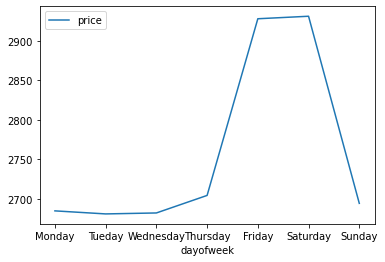

In [106]:
## 視覺化
price_week.plot()

In [107]:
## 顯示前十筆數據
calendar.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,dayofweek
0,375718,2021-01-01,f,2837.0,"$2,837.00",2.0,365.0,Friday
1,178036,2020-12-31,f,1276.0,"$1,276.00",1.0,90.0,Thursday
2,178036,2021-01-01,t,1276.0,"$1,276.00",1.0,90.0,Friday
3,178036,2021-01-02,t,1276.0,"$1,276.00",1.0,90.0,Saturday
4,178036,2021-01-03,t,580.0,$580.00,1.0,90.0,Sunday
5,178036,2021-01-04,t,580.0,$580.00,1.0,90.0,Monday
6,178036,2021-01-05,t,580.0,$580.00,1.0,90.0,Tueday
7,178036,2021-01-06,t,580.0,$580.00,1.0,90.0,Wednesday
8,178036,2021-01-07,t,580.0,$580.00,1.0,90.0,Thursday
9,178036,2021-01-08,t,638.0,$638.00,2.0,90.0,Friday


<ipython-input-120-c784297037cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar['dayofweek'] = calendar.date.dt.weekday


Text(0, 0.5, 'Price')

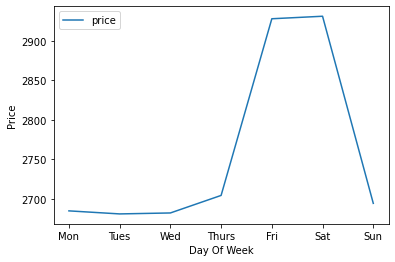

In [120]:
calendar['dayofweek'] = calendar.date.dt.weekday
## 創建要當x軸刻度的名稱串列
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
## 只要'dayofweek'跟'price'欄位
price_week = calendar[['dayofweek', 'price']]
## 使用reindex就會把其他欄位的值設成NaN，所以我們使用plt後處理的方式將x軸的刻度名稱補上
price_week = calendar.groupby(['dayofweek']).mean()#.reindex(cats)
# ## 把'listing_id','minimum_nights', 'maximum_nights'欄位拿掉
price_week.drop(['listing_id', 'minimum_nights', 'maximum_nights'], axis = 1, inplace = True)
price_week.plot()
## 更改x軸的刻度
## 設定範圍
ticks = list(range(0, 7, 1))
x_labels = 'Mon Tues Wed Thurs Fri Sat Sun'.split(' ')
plt.xticks(ticks, x_labels)

plt.xlabel('Day Of Week')
plt.ylabel('Price')
